In [1]:
import os #connecting local machine to your python
import numpy as np #calculation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### ML >  supervised ML > Classification problem > Algorithms > Logistic Regression

In [3]:
df1=pd.read_csv(r"C:\Vaibhav\IMARTICUS\Logistic Regression\Data.csv")

In [21]:
df1.head(5)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


### EDA

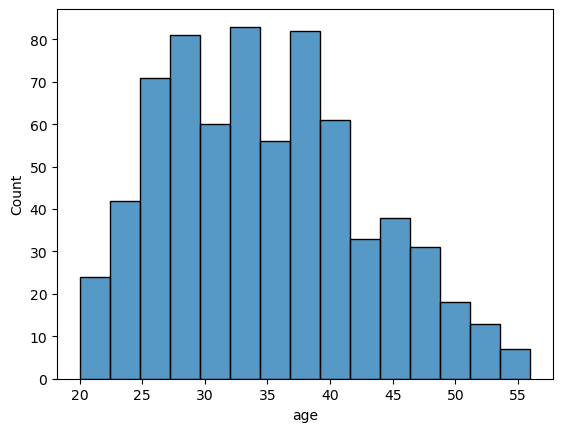

In [17]:
sns.histplot(data=df1, x="age")
plt.show()

In [18]:
def mynum_univariate(data, x, hist_plot=True, box_plot=True):
    minn=data[x].min()
    maxx=data[x].max()
    meann=data[x].mean()
    stdd=data[x].std()
    if hist_plot==True:
        sns.histplot(data=data, x=x)
        plt.show()
    if box_plot==True:
        sns.boxplot(data=data, y=x)
        plt.show()
    print("min:" , minn, "max:", maxx, "mean:", meann, "std:", stdd)
    

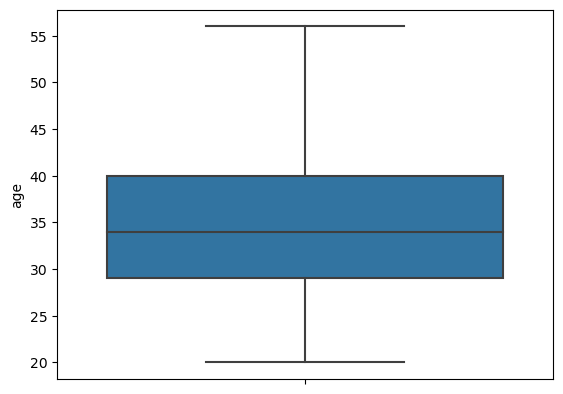

min: 20 max: 56 mean: 34.86 std: 7.997342190835055


In [24]:
mynum_univariate(data=df1, x="age", hist_plot=False, box_plot=True)

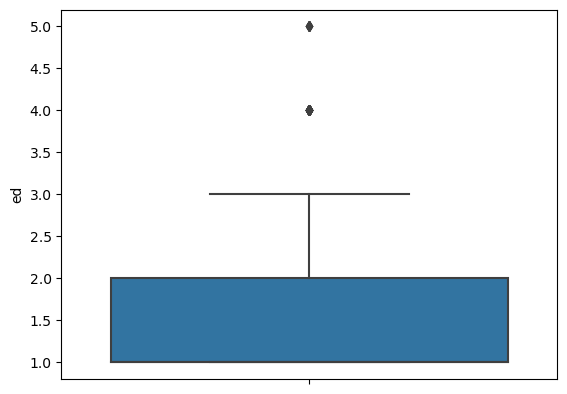

min: 1 max: 5 mean: 1.7228571428571429 std: 0.9282055277454309


In [25]:
mynum_univariate(data=df1, x="ed", hist_plot=False, box_plot=True)

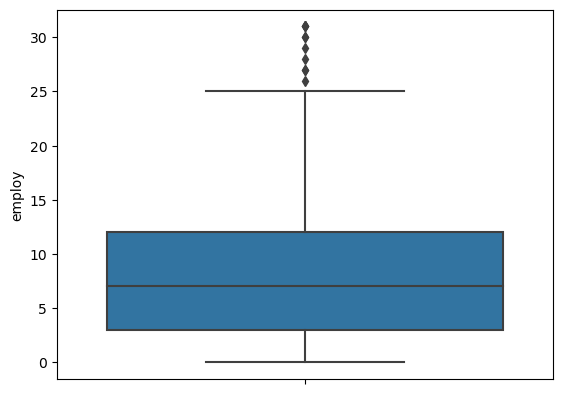

min: 0 max: 31 mean: 8.388571428571428 std: 6.658038970658316


In [26]:
mynum_univariate(data=df1, x="employ", hist_plot=False, box_plot=True)

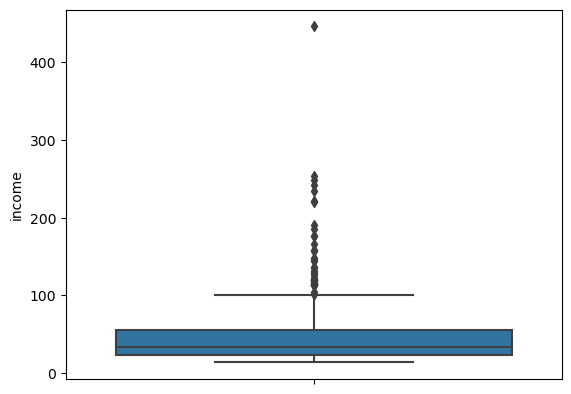

min: 14 max: 446 mean: 45.60142857142857 std: 36.81422640069052


In [27]:
mynum_univariate(data=df1, x="income", hist_plot=False, box_plot=True)

In [ ]:
mynum_univariate(data=df1, x="income", hist_plot=False, box_plot=True)

In [29]:
df2=df1.copy()
df2["income_log"]=np.log(df1["income"])

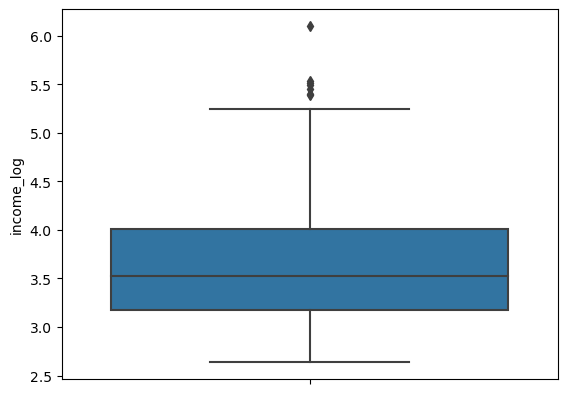

min: 2.6390573296152584 max: 6.100318952020064 mean: 3.6226934511987396 std: 0.58529092696396


In [32]:
mynum_univariate(data=df2, x="income_log", hist_plot=False, box_plot=True)

## Feature Engineering

### Missing Values

In [33]:
df1.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

### Outlier treatment(capping)

In [34]:
df1.describe(percentiles=[0.01,.02,.03,.04,.05,.1,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,50%,75%,90%,95%,96%,97%,98%,99%,max
age,700.0,34.860000,7.997342,20.000000,21.000000,22.000000,22.000000,23.000000,23.000000,25.000000,34.000000,40.000000,46.000000,49.000000,50.000000,51.000000,52.000000,53.010000,56.00000
ed,700.0,1.722857,0.928206,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000
employ,700.0,8.388571,6.658039,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,12.000000,18.000000,21.050000,22.000000,23.000000,24.000000,27.010000,31.00000
address,700.0,8.278571,6.824877,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,12.000000,18.000000,22.000000,23.000000,24.030000,25.020000,26.010000,34.00000
income,700.0,45.601429,36.814226,14.000000,15.000000,15.980000,16.000000,16.000000,17.000000,19.000000,34.000000,55.000000,82.000000,113.000000,118.080000,129.000000,148.180000,190.300000,446.00000
debtinc,700.0,10.260571,6.827234,0.400000,0.900000,1.200000,1.600000,1.700000,1.900000,2.900000,8.600000,14.125000,19.610000,23.800000,24.716000,25.709000,27.716000,30.701000,41.30000
creddebt,700.0,1.553553,2.117197,0.011696,0.030209,0.052661,0.072870,0.089062,0.107029,0.170020,0.854869,1.901955,3.621504,5.098264,5.579937,6.236958,7.394810,9.891428,20.56131
othdebt,700.0,3.058209,3.287555,0.045584,0.160936,0.196423,0.259929,0.342751,0.376727,0.562232,1.987567,3.923065,7.036180,9.501648,10.201442,11.728490,12.960384,17.184744,27.03360
default,700.0,0.261429,0.439727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [35]:
df1.shape

(700, 9)

In [36]:
df1.dtypes

age           int64
ed            int64
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
default       int64
dtype: object

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 49.3 KB


In [45]:
def myoutliers_percentile(x):
    x=x.clip(upper=x.quantile(.99))
    x=x.clip(lower=x.quantile(.01))
    return x

In [46]:
df2=df1.apply(myoutliers_percentile)

### Multicollinearity

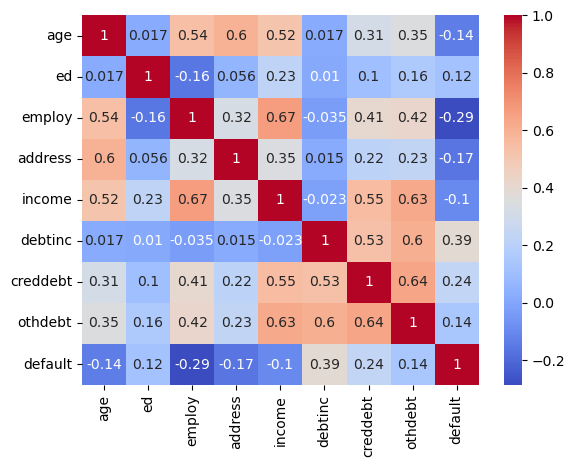

In [50]:
cr=df2.corr()
sns.heatmap(cr,annot=True,cmap="coolwarm")
plt.show()


###  model development

In [53]:
df2.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [51]:
# separate y and x
# split data into (x_train, y_train,) and (x_test, y_test)
# creat model object
# fit model on train data

In [55]:
y=df2["default"]
#x=df2[['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt', 'default']]
x=df2.drop(columns=["default"])

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.25, random_state=0)

In [62]:
logistic_model=LogisticRegression(max_iter=10000)

In [65]:
# help(logistic_model)

In [1]:
logistic_model.fit(x_train,y_train)

NameError: name 'logistic_model' is not defined

### model validation

In [68]:
logistic_model.coef_

array([[ 8.73378969e-03,  8.41448509e-02, -2.59103893e-01,
        -1.00182835e-01,  3.67082241e-04,  5.37386516e-02,
         6.50928212e-01,  8.24284719e-02]])

In [66]:
logistic_model.intercept_

array([-0.96348262])

In [72]:
logistic_model.score(x_train, y_train) #Accuracy

0.819047619047619

In [73]:
logistic_model.score(x_test, y_test) # Accuracy

0.7942857142857143

In [80]:
pd.DataFrame(logistic_model.predict_proba(x_train))

,0,1
0,0.219962,0.780038
1,0.997498,0.002502
2,0.926749,0.073251
3,0.628049,0.371951
4,0.842043,0.157957
...,...,...
520,0.303631,0.696369
521,0.860780,0.139220
522,0.517708,0.482292
523,0.850174,0.149826


In [76]:
pred_train

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [77]:
pred_test=logistic_model.predict(x_test)

In [78]:
pred_test

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [79]:
from sklearn import metrics

In [86]:
cmtrain=metrics.confusion_matrix(y_train, pred_train)

In [89]:
pd.DataFrame(cmtrain, columns=["Pred_0", "Pred_1"], index=["Act_0", "Act_1"])

,Pred_0,Pred_1
Act_0,353,33
Act_1,62,77


In [93]:
# recall=tp/(tp+fn)
recall=77/(77+62)
recall

0.5539568345323741

In [91]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       386
           1       0.70      0.55      0.62       139

    accuracy                           0.82       525
   macro avg       0.78      0.73      0.75       525
weighted avg       0.81      0.82      0.81       525



In [94]:
macro_avg(.85+.70)/2

0.7749999999999999

In [96]:
weighted_avg=(.85*386+.70*139)/(386+139)

In [97]:
weighted_avg

0.8102857142857143

In [99]:
cmtest=metrics.confusion_matrix(y_test, pred_test)
pd.DataFrame(cmtest, columns=["Pred_0", "Pred_1"], index=["Act_0", "Act_1"])


,Pred_0,Pred_1
Act_0,121,10
Act_1,26,18


In [100]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       131
           1       0.64      0.41      0.50        44

    accuracy                           0.79       175
   macro avg       0.73      0.67      0.69       175
weighted avg       0.78      0.79      0.78       175



### chnaging the value to maximise the recall value

In [102]:
prob_train = pd.DataFrame(logistic_model.predict_proba(x_train), columns=["prob+0","prob_1"])
prob_train.head()

,prob+0,prob_1
0,0.219962,0.780038
1,0.997498,0.002502
2,0.926749,0.073251
3,0.628049,0.371951
4,0.842043,0.157957


In [106]:
new_pred_train=np.where(prob_train["prob_1"]>=.3,1,0)
print(metrics.classification_report(y_train, new_pred_train))

              precision    recall  f1-score   support

           0       0.91      0.79      0.84       386
           1       0.57      0.78      0.66       139

    accuracy                           0.79       525
   macro avg       0.74      0.78      0.75       525
weighted avg       0.82      0.79      0.80       525



### ROC : Receiver Operators Characteristics

In [118]:
fpr, tpr,_=metrics.roc_curve(y_train, prob_train["prob_1"])

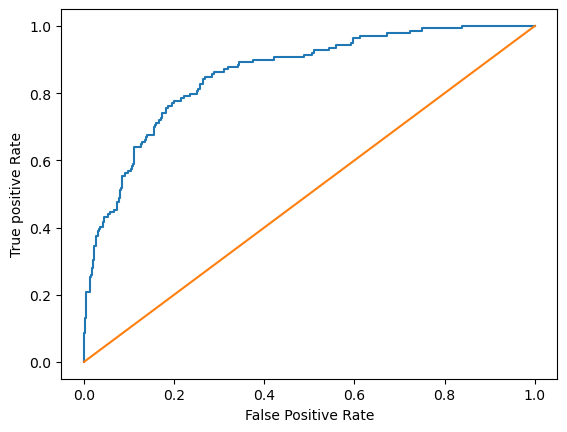

In [119]:
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.ylabel("True positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [120]:
prob_test = pd.DataFrame(logistic_model.predict_proba(x_test), columns=["prob+0","prob_1"])


### ROC : Receiver Operators Characteristics

In [122]:
fpr1, tpr1,_=metrics.roc_curve(y_test, prob_test["prob_1"])
auc1=metrics.auc(fpr1,tpr1)
auc1

0.8306731436502429

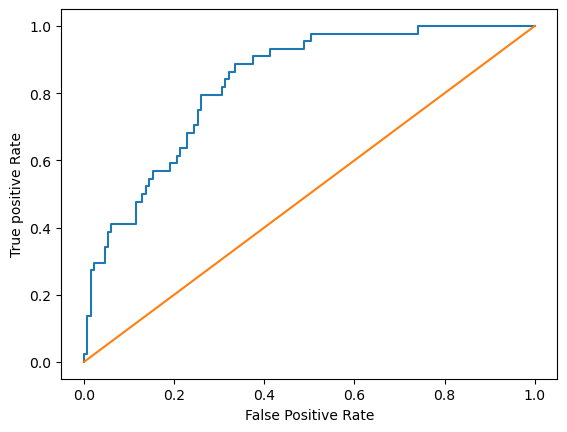

In [123]:
plt.plot(fpr1, tpr1)
plt.plot([0,1],[0,1])
plt.ylabel("True positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [124]:
new_data=pd.read_csv(r"C:\Vaibhav\IMARTICUS\Logistic Regression\cust_new.csv")

In [126]:
new_data.head(2)

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,700,36.0,1.0,16.0,13.0,32.0,10.9,0.544128,2.943872,NaN
1,701,50.0,1.0,6.0,27.0,21.0,12.9,1.316574,1.392426,NaN


In [127]:
new_data.drop(columns=["Unnamed: 0", "default"], inplace=True)

In [128]:
logistic_model.predict(new_data)

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [129]:
x_train.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt
165,40.0,2,13.0,11.0,102.0,18.9,6.226794,13.051206
553,47.0,2,17.0,23.0,41.0,9.5,0.455715,3.439285
34,25.0,1,8.0,1.0,35.0,2.9,0.077140,0.937860
685,35.0,1,7.0,5.0,39.0,16.1,1.701609,4.577391
200,28.0,1,3.0,7.0,19.0,4.1,0.260965,0.518035


In [133]:
dt=pd.DataFrame(logistic_model.predict_proba(new_data), columns=["Prob_0", "prob_1"])

In [134]:
new_pred=np.where(dt["prob_1"]>=.3,1,0)
new_pred

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])